# Data anlaysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bios = pd.read_csv('bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [3]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [6]:
bios.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,145500.0,73686.188955,42868.960158,1.0,36663.75,73302.5,110306.25,149814.0
height_cm,106651.0,176.333724,10.380282,127.0,170.00,176.0,183.00,226.0
weight_kg,102070.0,71.890996,14.465540,25.0,62.00,70.0,80.00,198.0


# LVL. 1

### What percentage of athlete records have missing height or weight?



In [9]:
# column-wise missing data
bios.isna().sum().sort_values(ascending = False)

,0
died_date,111560
weight_kg,43430
height_cm,38849
born_country,34592
born_region,34592
born_city,34592
born_date,1807
NOC,1
name,0
athlete_id,0


In [10]:
# missing_weight
missing_weight_percent = ((bios['weight_kg'].isna().sum()) / (bios.shape[0])) * 100
missing_weight_percent

np.float64(29.848797250859104)

In [12]:
# missing_height
missing_height_percent = ((bios['height_cm'].isna().sum()) / (bios.shape[0])) * 100
missing_height_percent

np.float64(26.700343642611685)

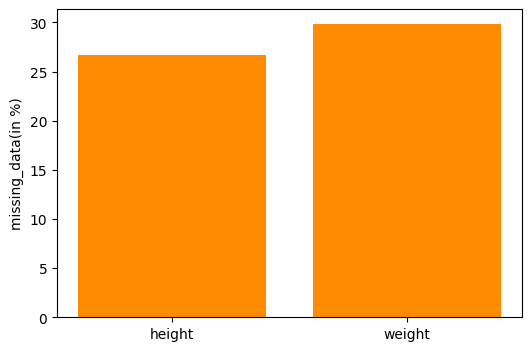

In [22]:
# plot of the two
missing_Data = {
    'height':missing_height_percent,
    'weight':missing_weight_percent
}
plt.figure(figsize = (6,4))
plt.bar(missing_Data.keys(), missing_Data.values(),color = 'darkorange')
# plt.xlabel(missing_Data.keys())
plt.ylabel('missing_data(in %)')

plt.show()

### Which columns suffer the most missing data, and why might that be historically?

In [24]:
bios.isna().sum().sort_values(ascending = False).head(1)
# because most of the athletes are alive

,0
died_date,111560


### How many athletes are alive vs deceased in the dataset?

In [30]:
alive = bios['died_date'].isnull().sum()
alive_percent = (alive / bios.shape[0]) * 100
alive_percent

np.float64(76.67353951890034)

In [32]:
dead = bios['died_date'].notna().sum()
dead_percent = (dead / bios.shape[0]) * 100
dead_percent

np.float64(23.326460481099655)

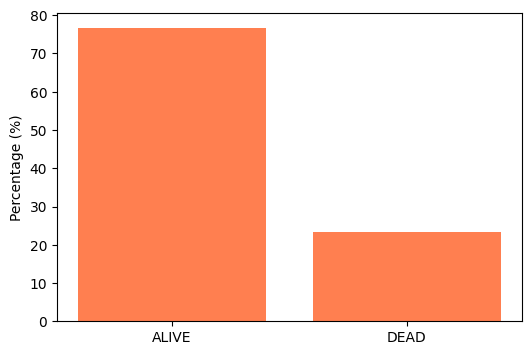

In [35]:
# plot of two
plt.figure(figsize = (6,4))
temp = {
    "ALIVE":alive_percent,
    "DEAD":dead_percent
}
plt.bar(temp.keys(),temp.values(),color = 'coral')
plt.ylabel('Percentage (%)')
plt.show()

### What is the earliest and latest birth year recorded?

In [36]:
# born_date > datetime > extract year > min() and max().
bios['born_datetime'] = pd.to_datetime(bios['born_date'])
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [38]:
# extracting the year from datetime
bios.insert(2, 'born_year', bios['born_datetime'].dt.year)
bios.head()

,athlete_id,name,born_year,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886.0,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969.0,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898.0,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895.0,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878.0,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [40]:
# earliest and latest birth year
print(bios['born_year'].min())
print(bios['born_year'].max())

1828.0
2009.0


### Are there duplicate athlete names?

In [41]:
name_count = bios['name'].value_counts()
name_count

,count
name,
Ivan Ivanov,13
Luis López,9
José González,9
José Pérez,8
José García,7
...,...
Rika Bruins,1
Kira Bulten,1
Hansje Bunschoten,1


In [46]:
# duplicates: name_count > 1
duplicate_name = name_count[name_count > 1]
duplicate_name.sort_values(ascending = False)

,count
name,
Ivan Ivanov,13
Luis López,9
José González,9
José Pérez,8
José García,7
...,...
Robert Phelps,2
Vladimir Petrov,2
Roberto López,2


In [53]:
top5_duplicate_names = duplicate_name.sort_values(ascending = False).head()
top5_duplicate_names

,count
name,
Ivan Ivanov,13
Luis López,9
José González,9
José Pérez,8
José García,7


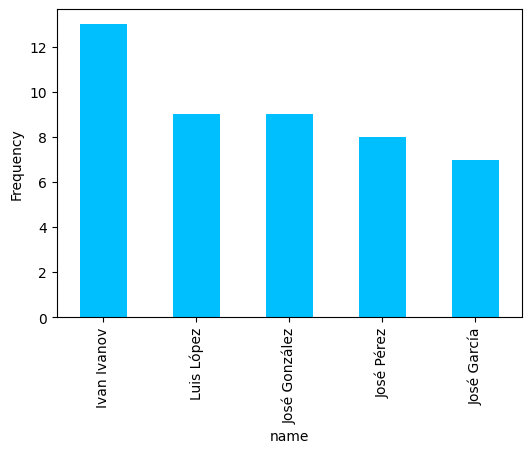

In [55]:
# plot for top 5 duplicate names
plt.figure(figsize = (6,4))
top5_duplicate_names.plot(kind = 'bar', color = 'deepskyblue')
plt.ylabel('Frequency')
plt.show()

# LVL. 2


### Which countries have produced the most athletes historically?

In [50]:
by_country = bios.groupby(bios['born_country']).size()
by_country.sort_values(ascending=False)

,0
born_country,
USA,9641
GER,6891
GBR,5792
FRA,5143
ITA,4709
...,...
Munich,1
SMT,1
SEY,1


In [56]:
# considering top 5
top5_countries = by_country.sort_values(ascending=False).head()
top5_countries

,0
born_country,
USA,9641
GER,6891
GBR,5792
FRA,5143
ITA,4709


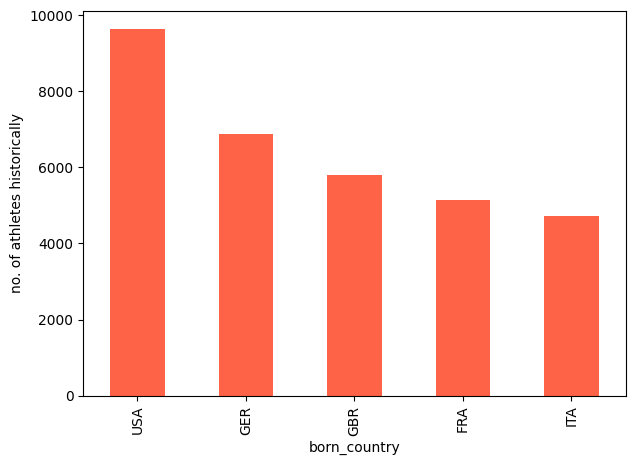

In [57]:
# plot of same
plt.figure(figsize=(7,5))
top5_countries.plot(kind = 'bar', color = 'tomato')
plt.ylabel('no. of athletes historically')
plt.show()

### How does athlete production change across decades?

In [59]:
# birth_year > decade > groupby decade > plot
bios['decade'] = (bios['born_year'] // 10) * 10
bios['decade']

,decade
0,1880.0
1,1960.0
2,1890.0
3,1890.0
4,1870.0
...,...
145495,2000.0
145496,1990.0
145497,1990.0
145498,1890.0


In [62]:
bios['decade'].sort_values().unique()

array([1820., 1830., 1840., 1850., 1860., 1870., 1880., 1890., 1900.,
       1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990.,
       2000.,   nan])

In [66]:
athletes_by_decade = bios.groupby('decade').count()['name']
athletes_by_decade.head()

,name
decade,
1820.0,1
1830.0,7
1840.0,35
1850.0,154
1860.0,485


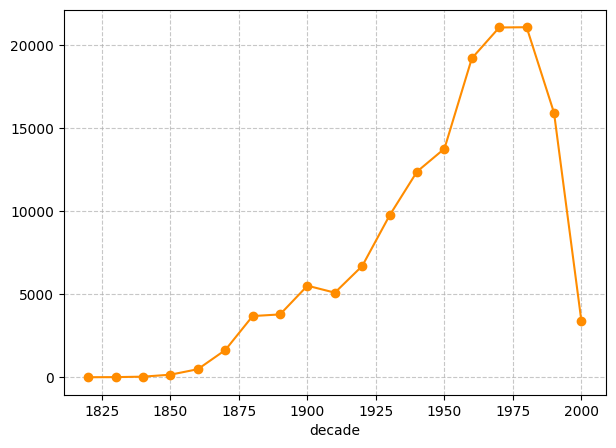

In [79]:
# plot for the same
plt.figure(figsize = (7,5))
athletes_by_decade.plot(kind = 'line', color = 'darkorange', marker = 'o')
# plt.xlabel('decade')
# plt.ylabel('athletes born')
plt.grid(axis = 'both', linestyle = 'dashed', alpha = 0.7)
plt.show()

### How many countries have produced fewer than 10 athletes?

In [83]:
by_country[by_country < 10].shape

(57,)

# LVL. 3


### What is the overall height distribution of athletes?

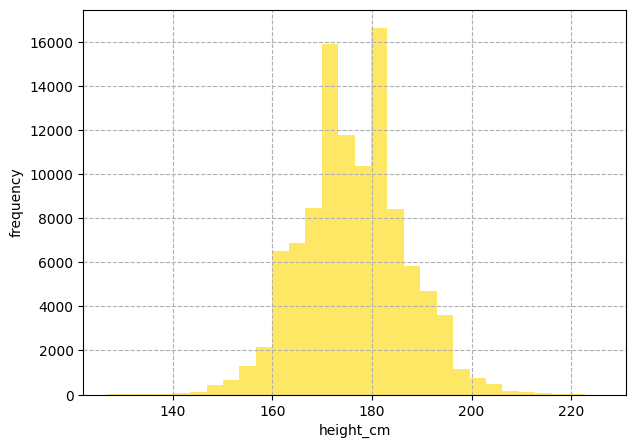

In [94]:
plt.figure(figsize= (7,5))
bios['height_cm'].dropna().plot(kind = 'hist', bins = 30, color = 'gold',alpha = 0.6)
plt.xlabel('height_cm')
plt.ylabel('frequency')
plt.grid(axis = 'both', linestyle = 'dashed')
plt.show()

### What is the overall weight distribution of athletes?

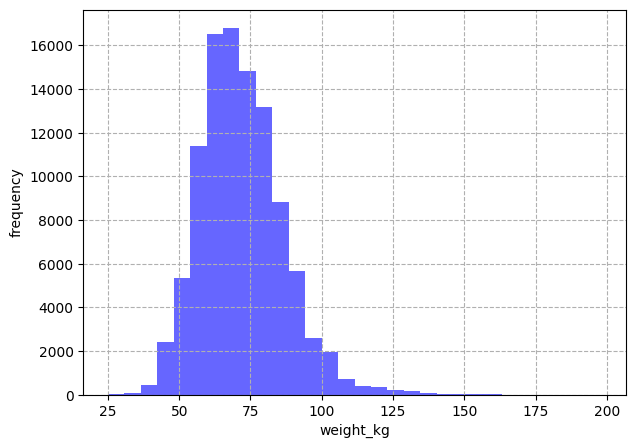

In [96]:
plt.figure(figsize=(7,5))
bios['weight_kg'].dropna().plot(kind = 'hist', bins = 30, color = 'blue',alpha = 0.6)
plt.xlabel('weight_kg')
plt.ylabel('frequency')
plt.grid(axis = 'both', linestyle = 'dashed')
plt.show()

### Is there a linear relationship between height and weight?

In [100]:
bios_temp = bios[['height_cm','weight_kg']]
bios_temp.isna().sum()

,0
height_cm,38849
weight_kg,43430


In [106]:
# Filling null values by mean
height_avg = bios_temp['height_cm'].mean()
print(height_avg)

weight_mean = bios_temp['weight_kg'].mean()
print(weight_mean)

176.3337240157148
71.89099637503674


In [107]:
bios_temp['height_cm'] = bios_temp['height_cm'].fillna(height_avg)

/tmp/ipython-input-1563545411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bios_temp['height_cm'] = bios_temp['height_cm'].fillna(height_avg)


In [109]:
bios_temp['weight_kg'] = bios_temp['weight_kg'].fillna(weight_mean)

/tmp/ipython-input-2850866761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bios_temp['weight_kg'] = bios_temp['weight_kg'].fillna(weight_mean)


In [110]:
# verify
bios_temp.isnull().sum()

,0
height_cm,0
weight_kg,0


In [116]:
# feature(x) and target(y)
x = bios_temp['height_cm'].values
y = bios_temp['weight_kg'].values

x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

In [117]:
# determining m
num = np.sum((np.mean(x) - x)*(np.mean(y) - y))
den = np.sum((np.mean(x) - x)**2)

m = num/den
m

np.float64(0.7623269711827654)

In [118]:
# determining b
b = np.mean(y) - (m * np.mean(x))
b

np.float64(1.3781095455881221e-15)

In [119]:
y_pred = m*x + b
y_pred

array([ 1.37810955e-15,  5.71829425e-01,  5.71829425e-01, ...,
       -1.14375939e+00, -8.86421066e-01,  1.37810955e-15])

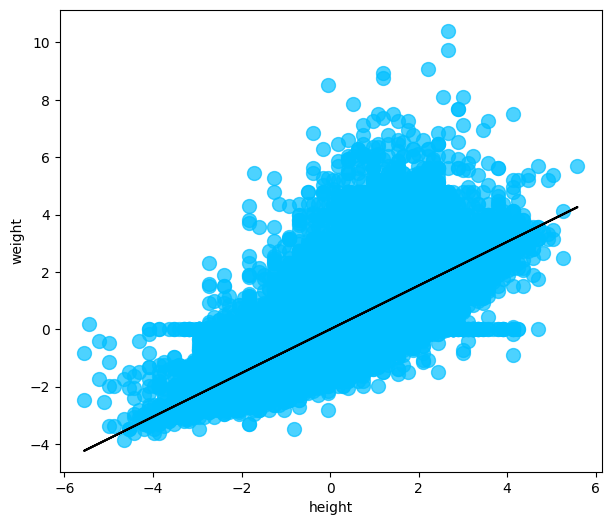

In [130]:
plt.figure(figsize=(7,6))
plt.scatter(x,y,color = 'deepskyblue', alpha = 0.7, label= 'actual data points', s = 100)
plt.plot(x,y_pred, color = 'black', label = 'predicted points')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [129]:
# coeff of correlation
pearson = np.corrcoef(x,y)[0,1]
print(pearson)

0.762326971182765


### Do modern-era athletes tend to be taller than early-era athletes?

>Before 1900 → Early era

>1900 onwards → Modern era

In [134]:
sorted_decades = bios['decade'].sort_values().unique()

In [135]:
sorted_decades

array([1820., 1830., 1840., 1850., 1860., 1870., 1880., 1890., 1900.,
       1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990.,
       2000.,   nan])

In [136]:
bios['era'] = np.where(bios['decade'] < 1900, 'Early', 'Modern')

In [137]:
bios.head()

,athlete_id,name,born_year,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,decade,era
0,1,Jean-François Blanchy,1886.0,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12,1880.0,Early
1,2,Arnaud Boetsch,1969.0,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01,1960.0,Modern
2,3,Jean Borotra,1898.0,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13,1890.0,Early
3,4,Jacques Brugnon,1895.0,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11,1890.0,Early
4,5,Albert Canet,1878.0,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17,1870.0,Early


In [139]:
# early era df
early_era_athletes = bios[bios['era'] == 'Early']
early_era_athletes.head()

,athlete_id,name,born_year,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,decade,era
0,1,Jean-François Blanchy,1886.0,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12,1880.0,Early
2,3,Jean Borotra,1898.0,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13,1890.0,Early
3,4,Jacques Brugnon,1895.0,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11,1890.0,Early
4,5,Albert Canet,1878.0,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17,1870.0,Early
8,9,Marcel Cousin,1896.0,1896-08-04,Nîmes,Gard,FRA,France,NaN,NaN,1986-08-01,1896-08-04,1890.0,Early


In [140]:
# modern era df
modern_era_athletes = bios[bios['era'] == 'Modern']
modern_era_athletes.head()

,athlete_id,name,born_year,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,decade,era
1,2,Arnaud Boetsch,1969.0,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01,1960.0,Modern
5,6,Nicolas Chatelain,1970.0,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN,1970-01-13,1970.0,Modern
6,7,Patrick Chila,1969.0,1969-11-27,Ris-Orangis,Essonne,FRA,France,180.0,73.0,NaN,1969-11-27,1960.0,Modern
7,8,Henri Cochet,1901.0,1901-12-14,Villeurbanne,Rhône,FRA,France,NaN,NaN,1987-04-02,1901-12-14,1900.0,Modern
12,13,J. Defert,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaT,NaN,Modern


In [141]:
# average height of early era athletes
early_avg_height = early_era_athletes['height_cm'].mean()
early_avg_height

np.float64(175.42595978062158)

In [142]:
# average height of modern era athletes
modern_avg_height = modern_era_athletes['height_cm'].mean()
modern_avg_height

np.float64(176.34790972288354)

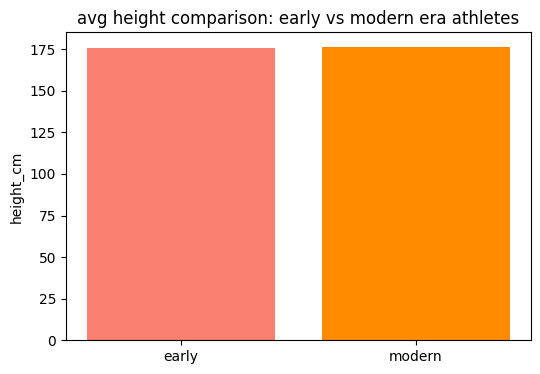

In [144]:
# plot of same
plt.figure(figsize=(6,4))
height = {
    'early':early_avg_height,
    'modern':modern_avg_height
}
plt.bar(height.keys(), height.values(), color = ['salmon','darkorange'])
plt.ylabel('height_cm')
plt.title('avg height comparison: early vs modern era athletes')
plt.show()

In [145]:
# same logic for weight
# average weight of early era athletes
early_avg_weight = early_era_athletes['weight_kg'].mean()
print(early_avg_weight)

# average weight of modern era athletes
modern_avg_weight = modern_era_athletes['weight_kg'].mean()
print(modern_avg_weight)

72.21037181996086
71.88776621011796


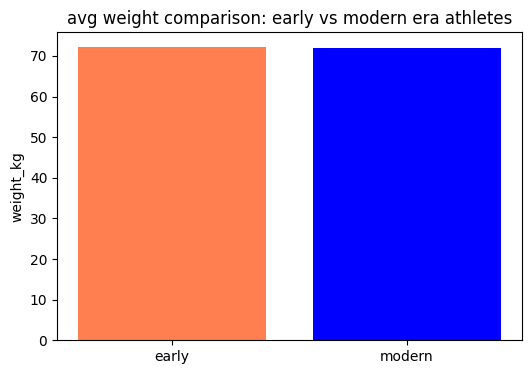

In [146]:
# plot of same
plt.figure(figsize=(6,4))
weight = {
    'early':early_avg_weight,
    'modern':modern_avg_weight
}
plt.bar(weight.keys(), weight.values(), color = ['coral','blue'])
plt.ylabel('weight_kg')
plt.title('avg weight comparison: early vs modern era athletes')
plt.show()

early athletes were heavier
moder athletes are taller
The difference is not significant